In [1]:
from pathlib import Path
from omnicloudmask import predict_from_array
import h5py
from matplotlib import pyplot as plt
from urllib.request import urlretrieve

In [2]:
sample_scene_url = "https://storage.googleapis.com/open-cogs/planet-stac/release1-basic-radiance/20250302_030003_92_4001_basic_radiance.h5"

In [3]:
scene_path = Path("PlanetScope data",sample_scene_url.split("/")[-1])
scene_path.parent.mkdir(parents=True, exist_ok=True)

In [4]:
urlretrieve(sample_scene_url, scene_path)

(Path('PlanetScope data/20250302_030003_92_4001_basic_radiance.h5'),
 <http.client.HTTPMessage at 0x17ce97c10>)

In [5]:
file = h5py.File(scene_path, "r")
array = file["HDFEOS"]["SWATHS"]["HYP"]["Data Fields"]["toa_radiance"][:]

In [6]:
red_index = 58
green_index = 37
blue_index = 23
nir_index = 98

In [7]:
rgnir= array[ [red_index, green_index, nir_index]]
rgb= array[ [red_index, green_index, blue_index]]

In [8]:
pred= predict_from_array(
    rgnir)

/Users/nick/Documents/Work Code/OmniCloudMask/omnicloudmask/cloud_mask.py:207: UserWarning: Patch size too large, reducing to 607 and 
            overlap to 300.
  patch_overlap, patch_size = check_patch_size(


In [9]:
rgb = rgb.transpose(1, 2, 0)/300

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.022625767..1.5579183].


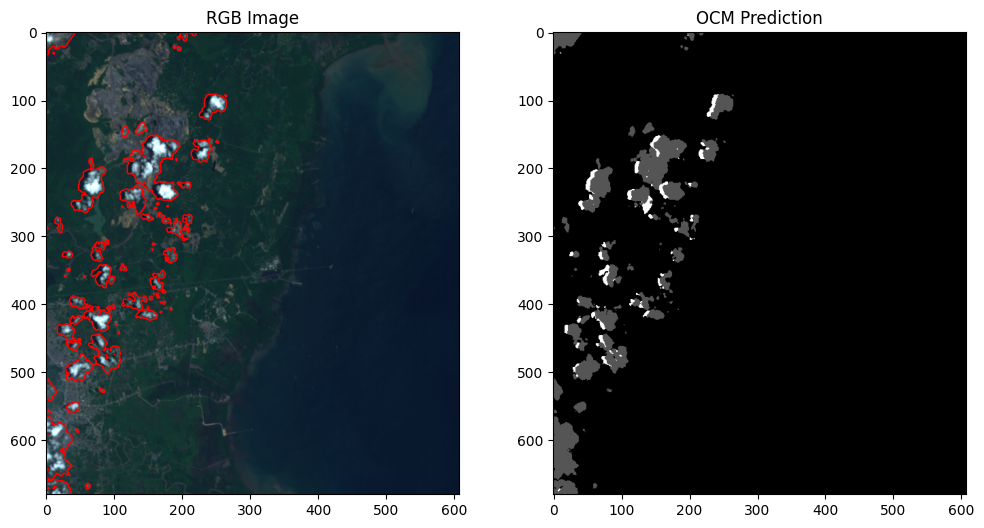

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rgb)
ax[0].contour(pred[0], levels=[0.5], colors='red', linewidths=1)
ax[0].set_title('RGB Image')
ax[1].imshow(pred[0], cmap='gray')
ax[1].set_title('OCM Prediction')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.022625767..1.5579183].


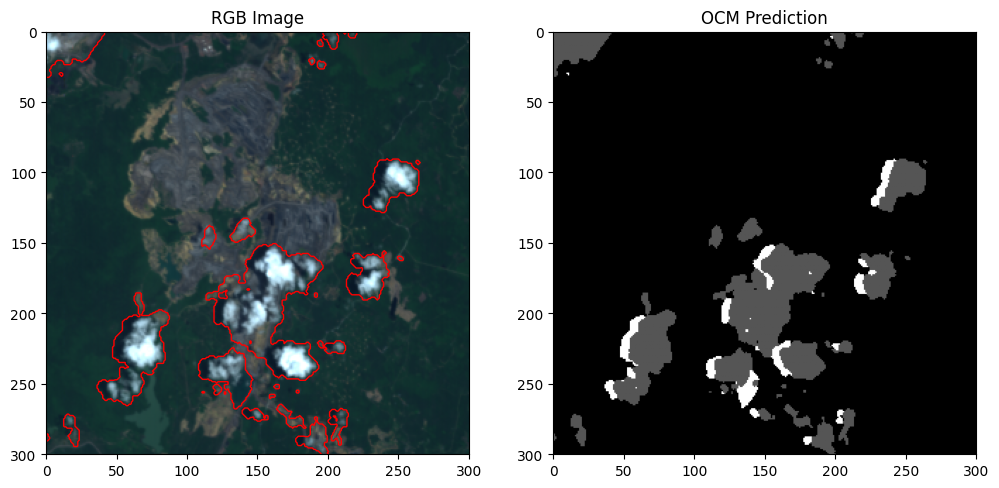

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rgb)
ax[0].contour(pred[0], levels=[.5], colors="red", linewidths=1)
ax[0].set_title("RGB Image")
ax[0].set_xlim(0, 300)
ax[0].set_ylim(300, 0)
ax[1].imshow(pred[0], cmap="gray")
ax[1].set_title("OCM Prediction")
ax[1].set_xlim(0, 300)
ax[1].set_ylim(300, 0)
plt.show()